# Классификация текстов с использованием Наивного Байесовского Классификатора

In [78]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import \
    classification_report, roc_auc_score, roc_curve, auc

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [54]:
email_data = pd.read_csv('data/spam_or_not_spam.csv')
email_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [57]:
email_data.groupby('label').count()

,email
label,
0,2500
1,499


Платформа не принимает ответ 499 (хочет 500)

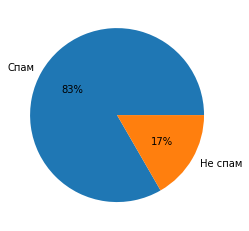

In [79]:
y = np.array(email_data['label'].value_counts())
# метки диаграммы
mylabels = ["Спам", "Не спам"]


#create pie chart
plt.pie(y, labels = mylabels, autopct='%.0f%%')
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [72]:
email_data_clean = email_data.copy()
email_data_clean = email_data_clean.replace('^\s*$', np.NaN, regex=True)
email_data_drop = email_data_clean.copy()
email_data_drop = email_data_drop.dropna(how='any', axis=0)

Переводим данные в векторный вид:

In [74]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email_data_drop["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [75]:
print(X.shape)

(2997, 34116)


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [83]:
y = email_data_drop['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [85]:
y_test.mean()

0.16533333333333333

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

Проверим показатели  алгоритма MultinomialNB

In [96]:
mnb = MultinomialNB(alpha=0.01)
mnb.fit(X_train, y_train)

y_test_pred = mnb.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [97]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")

Accuracy: 0.9866666666666667
Precision: 1.0
Recall: 0.9193548387096774


Проверим показатели  алгоритма ComplementNB

In [98]:
cmb = ComplementNB(alpha=0.01)
cmb.fit(X_train, y_train)

y_test_pred = cmb.predict(X_test)

In [99]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")

Accuracy: 0.988
Precision: 1.0
Recall: 0.9274193548387096


Нарисуйте ROC-кривую:

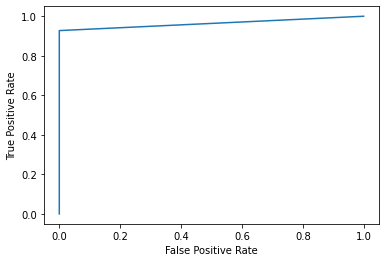

In [100]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [127]:
alpha_arr = np.arange(0.008, 0.011, 0.0002)
acc_score = []
pre_score = []
rec_score = []

for  i in alpha_arr:
    cmb = ComplementNB(alpha=i)
    cmb.fit(X_train, y_train)

    y_test_pred = cmb.predict(X_test)
    
    acc_score.append(accuracy_score(y_test, y_test_pred))
    pre_score.append(precision_score(y_test, y_test_pred))
    rec_score.append(recall_score(y_test, y_test_pred))

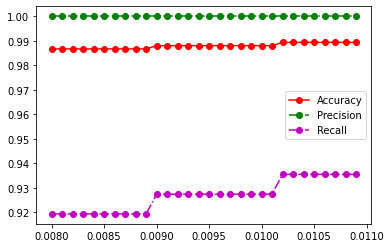

In [132]:
#plt.plot(alpha_arr,acc_score,alpha_arr,pre_score,alpha_arr,rec_score)
plt.plot(alpha_arr, acc_score, 'o-r', label='Accuracy')
plt.plot(alpha_arr, pre_score, 'o-.g', label='Precision')
plt.plot(alpha_arr, rec_score, 'o-.m', label='Recall')
plt.legend()

Дальнейший рост не влияет на результаты (проверял)

In [133]:
cmb = ComplementNB(alpha=0.011)
cmb.fit(X_train, y_train)

y_test_pred = cmb.predict(X_test)

In [134]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")

Accuracy: 0.9893333333333333
Precision: 1.0
Recall: 0.9354838709677419


Как можно заметить, значение параметра alpha влияет на качество классификации (пусть и немного). 